# K-Means Clustering

K-means is an **unsupervised learning** algorithm that learns the features of a dataset and tries to "figure out" the groups (categories, which are the "k" value) based on similarities. These groups are classified by their distance to a **centroid**, which is the mean of a cluster group. K-means can help identify segments of data points that have similar features, even though they may not belong to the same target category. Unsupervised learning is less about trying to predict the correct categories, moreso than it is about finding trends of data points that seem to be similar. 

![Supervised vs Unsupervised learning](https://notebooks.azure.com/priesterkc/projects/testdb/raw/kmeans_cluster.png)

Source: [Towards Data Science: Unsupervised Learning with Python](https://towardsdatascience.com/unsupervised-learning-with-python-173c51dc7f03)

In [1]:
from sklearn.cluster import KMeans  #algorithm in sklearn library to do k-means clustering

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
#use dataset with
location = "CC GENERAL.csv"
df = pd.read_csv(location)

#in this dataframe, features 1 & 2 are the characteristics of each data point (predictive features) 
#C is the target variable (categories to predict)
df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
5,C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12
6,C10007,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,0.000000,0,64,13500.0,6354.314328,198.065894,1.000000,12
7,C10008,1823.652743,1.000000,436.20,0.00,436.20,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,2300.0,679.065082,532.033990,0.000000,12
8,C10009,1014.926473,1.000000,861.49,661.49,200.00,0.000000,0.333333,0.083333,0.250000,0.000000,0,5,7000.0,688.278568,311.963409,0.000000,12
9,C10010,152.225975,0.545455,1281.60,1281.60,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,3,11000.0,1164.770591,100.302262,0.000000,12


In [3]:
df.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

In [4]:

df.dtypes

CUST_ID                              object
BALANCE                             float64
BALANCE_FREQUENCY                   float64
PURCHASES                           float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
CASH_ADVANCE                        float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                      int64
PURCHASES_TRX                         int64
CREDIT_LIMIT                        float64
PAYMENTS                            float64
MINIMUM_PAYMENTS                    float64
PRC_FULL_PAYMENT                    float64
TENURE                                int64
dtype: object

In [5]:

df.count()

CUST_ID                             8950
BALANCE                             8950
BALANCE_FREQUENCY                   8950
PURCHASES                           8950
ONEOFF_PURCHASES                    8950
INSTALLMENTS_PURCHASES              8950
CASH_ADVANCE                        8950
PURCHASES_FREQUENCY                 8950
ONEOFF_PURCHASES_FREQUENCY          8950
PURCHASES_INSTALLMENTS_FREQUENCY    8950
CASH_ADVANCE_FREQUENCY              8950
CASH_ADVANCE_TRX                    8950
PURCHASES_TRX                       8950
CREDIT_LIMIT                        8949
PAYMENTS                            8950
MINIMUM_PAYMENTS                    8637
PRC_FULL_PAYMENT                    8950
TENURE                              8950
dtype: int64

In [6]:
  #fill the empty CREDIT_LIMIT with the mean of CREDIT_LIMIT grouped by TENURE
#DON'T FORGET 'inplace=True'
df['CREDIT_LIMIT'].fillna(df.groupby(['TENURE'])['CREDIT_LIMIT'].transform('mean'),inplace=True)
df['MINIMUM_PAYMENTS'].fillna(df.groupby(['TENURE'])['MINIMUM_PAYMENTS'].transform('mean'),inplace=True)
df.count()

CUST_ID                             8950
BALANCE                             8950
BALANCE_FREQUENCY                   8950
PURCHASES                           8950
ONEOFF_PURCHASES                    8950
INSTALLMENTS_PURCHASES              8950
CASH_ADVANCE                        8950
PURCHASES_FREQUENCY                 8950
ONEOFF_PURCHASES_FREQUENCY          8950
PURCHASES_INSTALLMENTS_FREQUENCY    8950
CASH_ADVANCE_FREQUENCY              8950
CASH_ADVANCE_TRX                    8950
PURCHASES_TRX                       8950
CREDIT_LIMIT                        8950
PAYMENTS                            8950
MINIMUM_PAYMENTS                    8950
PRC_FULL_PAYMENT                    8950
TENURE                              8950
dtype: int64

In [7]:

df1 = df[['CUST_ID','BALANCE','PURCHASES','CASH_ADVANCE','CREDIT_LIMIT','PAYMENTS','MINIMUM_PAYMENTS','TENURE']]
df1.head()

,CUST_ID,BALANCE,PURCHASES,CASH_ADVANCE,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,TENURE
0,C10001,40.900749,95.40,0.000000,1000.0,201.802084,139.509787,12
1,C10002,3202.467416,0.00,6442.945483,7000.0,4103.032597,1072.340217,12
2,C10003,2495.148862,773.17,0.000000,7500.0,622.066742,627.284787,12
3,C10004,1666.670542,1499.00,205.788017,7500.0,0.000000,913.155148,12
4,C10005,817.714335,16.00,0.000000,1200.0,678.334763,244.791237,12


In [8]:
df1 = df.drop(['CUST_ID','BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX','MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'], axis=1)

In [9]:
df1.describe()

,BALANCE,CREDIT_LIMIT,PAYMENTS
count,8950.000000,8950.000000,8950.000000
mean,1564.474828,4494.282759,1733.143852
std,2081.531879,3638.646584,2895.063757
min,0.000000,50.000000,0.000000
25%,128.281915,1600.000000,383.276166
50%,873.385231,3000.000000,856.901546
75%,2054.140036,6500.000000,1901.134317
max,19043.138560,30000.000000,50721.483360


In [10]:
# View missing values (count)
df1.isna().sum()

BALANCE         0
CREDIT_LIMIT    0
PAYMENTS        0
dtype: int64

In [11]:
# Fill NAs by mean
df1 = df1.fillna(df1.mean())

df1.isna().sum()

BALANCE         0
CREDIT_LIMIT    0
PAYMENTS        0
dtype: int64

In [12]:
df1['PAYMENTS'].unique()

array([ 201.802084, 4103.032597,  622.066742, ...,   81.270775,
         52.549959,   63.165404])

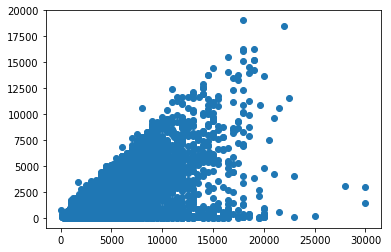

In [13]:
#plot data points to visually see where they are
#on small and distinctive dataset, easier to see clusters
plt.scatter(df1['CREDIT_LIMIT'],df['BALANCE'])

In [14]:
#make a dataframe called X to hold the predictive features
X = df1.drop('PAYMENTS', axis=1)
X.head()

,BALANCE,CREDIT_LIMIT
0,40.900749,1000.0
1,3202.467416,7000.0
2,2495.148862,7500.0
3,1666.670542,7500.0
4,817.714335,1200.0


In [15]:
#dataframe of one column
#holds target variable "category"
y = df1['PAYMENTS'].copy()
y.head()

0     201.802084
1    4103.032597
2     622.066742
3       0.000000
4     678.334763
Name: PAYMENTS, dtype: float64

In [16]:
#initialize k-means function
#set number of clusters to categorize =7
kmeans = KMeans(n_clusters=7)

#the model will learn which data points seem similar
#calculates centroids
#classfies data points in clusters based on distance to centroids
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=7, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [17]:
#data point coordinates for centroids of each cluster
#index 0 is A
#index 1 is B
#index 2 is C
#index 3 is D
print(kmeans.cluster_centers_)

[[ 1044.91274848  3636.9210474 ]
 [ 5685.84651636  9774.26622243]
 [  620.7627926   1528.49749976]
 [  780.0186518   7570.81432081]
 [ 1132.49950593 14728.65384615]
 [ 9814.59785811 14953.61445783]
 [ 3925.99588679  5777.60097919]]


Text(0, 0.5, 'CREDIT_LIMIT')

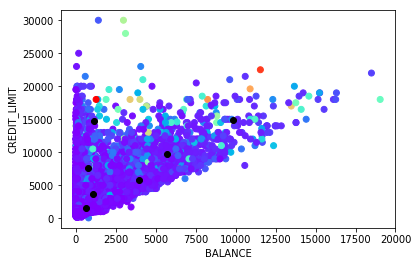

In [18]:
#scatterplot of original categories with k-means calculated centroids

#clusters of original features based on original category
plt.scatter(df1['BALANCE'],df1['CREDIT_LIMIT'], c=df['PAYMENTS'], cmap= 'rainbow')

#plot x, y axis coordinates for centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c='black')
plt.xlabel('BALANCE')
plt.ylabel('CREDIT_LIMIT')

In [19]:
#add a new column to dataframe called "cluster"
#can use this to compare features of clusters to original categories
df1['cluster'] = kmeans.labels_
df1.head()

,BALANCE,CREDIT_LIMIT,PAYMENTS,cluster
0,40.900749,1000.0,201.802084,2
1,3202.467416,7000.0,4103.032597,6
2,2495.148862,7500.0,622.066742,3
3,1666.670542,7500.0,0.000000,3
4,817.714335,1200.0,678.334763,2


In [20]:
df1['cluster'].value_counts()

2    3533
0    2305
3    1294
6     819
1     573
4     260
5     166
Name: cluster, dtype: int64


Category number and cluster number will not always be the same!

Cluster number is assigned based on the index number of the centroid a data point is closest to.

In [21]:
#predict category of new data point
kpred = [3000, 3000]

#model thinks new data point belongs to upper-left cluster
print(kmeans.predict([kpred]))

[0]


Text(0, 0.5, 'CREDIT_LIMIT')

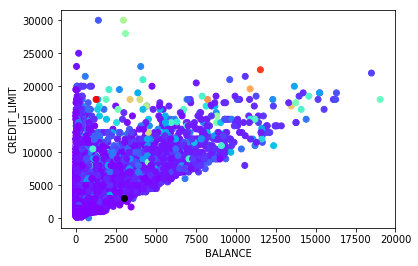

In [22]:
#see plot of new data point

#k-means predicted clusters (in color) for the data points
plt.scatter(df1['BALANCE'],df1['CREDIT_LIMIT'], c=df1['PAYMENTS'], cmap= 'rainbow')

#new data point is the black dot
plt.scatter(kpred[0],kpred[1],c='black')
plt.xlabel('BALANCE')
plt.ylabel('CREDIT_LIMIT')

In [23]:
df2 = df[['CUST_ID','BALANCE','PURCHASES','CASH_ADVANCE','CREDIT_LIMIT','PAYMENTS','MINIMUM_PAYMENTS','TENURE']]
df2.head()

,CUST_ID,BALANCE,PURCHASES,CASH_ADVANCE,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,TENURE
0,C10001,40.900749,95.40,0.000000,1000.0,201.802084,139.509787,12
1,C10002,3202.467416,0.00,6442.945483,7000.0,4103.032597,1072.340217,12
2,C10003,2495.148862,773.17,0.000000,7500.0,622.066742,627.284787,12
3,C10004,1666.670542,1499.00,205.788017,7500.0,0.000000,913.155148,12
4,C10005,817.714335,16.00,0.000000,1200.0,678.334763,244.791237,12


In [24]:

# View missing values (count)
df2.isna().sum()

CUST_ID             0
BALANCE             0
PURCHASES           0
CASH_ADVANCE        0
CREDIT_LIMIT        0
PAYMENTS            0
MINIMUM_PAYMENTS    0
TENURE              0
dtype: int64

In [25]:

# Fill NAs by mean
df2 = df2.fillna(df2.mean())

df2.isna().sum()

CUST_ID             0
BALANCE             0
PURCHASES           0
CASH_ADVANCE        0
CREDIT_LIMIT        0
PAYMENTS            0
MINIMUM_PAYMENTS    0
TENURE              0
dtype: int64

In [26]:
#add a new column to dataframe called "cluster"
#can use this to compare features of clusters to original categories
df2['CLUSTER'] = kmeans.labels_
df2.head()

,CUST_ID,BALANCE,PURCHASES,CASH_ADVANCE,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,TENURE,CLUSTER
0,C10001,40.900749,95.40,0.000000,1000.0,201.802084,139.509787,12,2
1,C10002,3202.467416,0.00,6442.945483,7000.0,4103.032597,1072.340217,12,6
2,C10003,2495.148862,773.17,0.000000,7500.0,622.066742,627.284787,12,3
3,C10004,1666.670542,1499.00,205.788017,7500.0,0.000000,913.155148,12,3
4,C10005,817.714335,16.00,0.000000,1200.0,678.334763,244.791237,12,2


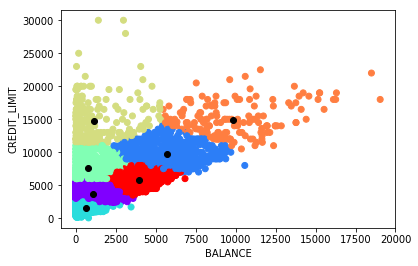

In [27]:
#plot BALANCE vs CREDIT_LIMIT
plt.xlabel('BALANCE')
plt.ylabel('CREDIT_LIMIT')
plt.scatter(df2['BALANCE'], df2['CREDIT_LIMIT'], c= df2['CLUSTER'], cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c='black')

In [28]:
#predict category of new data point
kpred = [2000,3000]

#model thinks new data point belongs to upper-left cluster
print(kmeans.predict([kpred]))

[0]


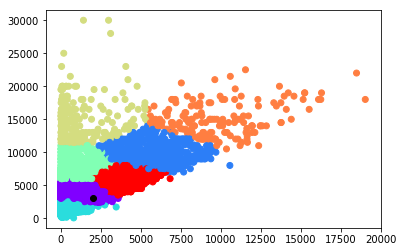

In [29]:

#see plot of new data point

#k-means predicted clusters (in color) for the data points
plt.scatter(df2['BALANCE'],df2['CREDIT_LIMIT'], c=df2['CLUSTER'], cmap= 'rainbow')

#new data point is the black dot
plt.scatter(kpred[0],kpred[1],c='black')

In [30]:

df3 = df2.drop(['CUST_ID','CASH_ADVANCE', 'MINIMUM_PAYMENTS','CLUSTER'], axis=1)
df3.head()

,BALANCE,PURCHASES,CREDIT_LIMIT,PAYMENTS,TENURE
0,40.900749,95.40,1000.0,201.802084,12
1,3202.467416,0.00,7000.0,4103.032597,12
2,2495.148862,773.17,7500.0,622.066742,12
3,1666.670542,1499.00,7500.0,0.000000,12
4,817.714335,16.00,1200.0,678.334763,12


In [31]:

#initialize k-means function
#set number of clusters to categorize = 7
kmeans = KMeans(n_clusters=7)

#the model will learn which data points seem similar
#calculates centroids
#classfies data points in clusters based on distance to centroids
kmeans.fit(df3)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=7, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [32]:

#data point coordinates for centroids of each cluster

print(kmeans.cluster_centers_)

[[7.69856391e+02 4.82660436e+02 2.07118715e+03 8.48785882e+02
  1.13528496e+01]
 [7.30346049e+03 1.45771755e+03 1.10009804e+04 2.58888925e+03
  1.17078431e+01]
 [2.01353034e+03 3.34733333e+03 6.24631860e+03 6.08152734e+03
  1.18691438e+01]
 [5.21440116e+03 4.42677417e+03 1.21760870e+04 1.61023730e+04
  1.18086957e+01]
 [1.84945673e+03 8.63359674e+02 6.15249946e+03 1.26638277e+03
  1.17139480e+01]
 [1.00713436e+03 1.57570167e+03 1.24167059e+04 2.00960416e+03
  1.16847059e+01]
 [5.35154611e+03 2.70853092e+04 1.63600000e+04 2.71590435e+04
  1.19200000e+01]]


Text(0, 0.5, 'CREDIT_LIMIT')

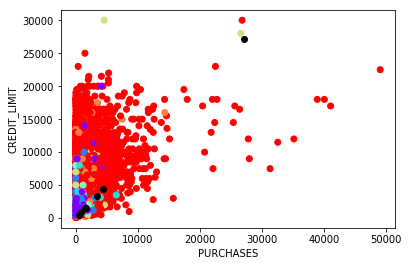

In [33]:
#scatterplot of PURCHASES AND CREDIT_LIMIT with k-means calculated centroids

#clusters of original features based on original category
plt.scatter(df3['PURCHASES'], df3['CREDIT_LIMIT'], c=df3['TENURE'], cmap='rainbow')

#plot x, y axis coordinates for centroids
plt.scatter(kmeans.cluster_centers_[:,1], kmeans.cluster_centers_[:,1], c='black')

plt.xlabel('PURCHASES')
plt.ylabel('CREDIT_LIMIT')

Text(0, 0.5, 'PAYMENTS')

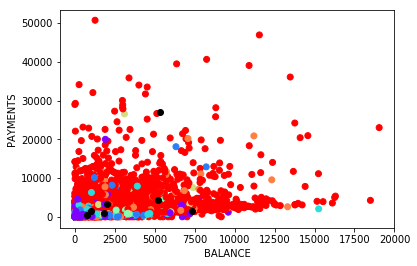

In [34]:

#scatterplot of PURCHASES AND CREDIT_LIMIT with k-means calculated centroids

#clusters of original features based on original category
plt.scatter(df3['BALANCE'], df3['PAYMENTS'], c=df3['TENURE'], cmap='rainbow')

#plot x, y axis coordinates for centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c='black')

plt.xlabel('BALANCE')
plt.ylabel('PAYMENTS')

In [35]:
#add a new column to dataframe called "cluster"
#can use this to compare features of clusters to original categories
df3['CLUSTER'] = kmeans.labels_
df3.head()

,BALANCE,PURCHASES,CREDIT_LIMIT,PAYMENTS,TENURE,CLUSTER
0,40.900749,95.40,1000.0,201.802084,12,0
1,3202.467416,0.00,7000.0,4103.032597,12,4
2,2495.148862,773.17,7500.0,622.066742,12,4
3,1666.670542,1499.00,7500.0,0.000000,12,4
4,817.714335,16.00,1200.0,678.334763,12,0


In [36]:
df3['CLUSTER'] . value_counts()

0    5141
4    2115
2     619
1     510
5     425
3     115
6      25
Name: CLUSTER, dtype: int64

Text(0, 0.5, 'CREDIT_LIMIT')

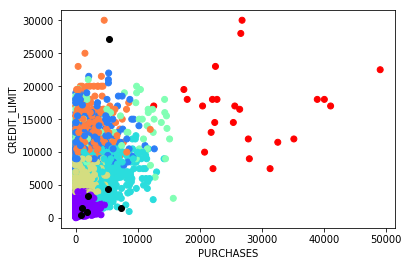

In [37]:

#scatterplot of PURCHASES AND CREDIT_LIMIT with k-means calculated centroids

#clusters of original features based on original category
plt.scatter(df3['PURCHASES'], df3['CREDIT_LIMIT'], c=df3['CLUSTER'], cmap='rainbow')

#plot x, y axis coordinates for centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c='black')

plt.xlabel('PURCHASES')
plt.ylabel('CREDIT_LIMIT')

Text(0, 0.5, 'PAYMENTS')

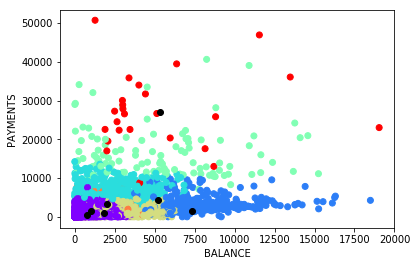

In [38]:
#scatterplot of PURCHASES AND CREDIT_LIMIT with k-means calculated centroids

#clusters of original features based on original category
plt.scatter(df3['BALANCE'], df3['PAYMENTS'], c=df3['CLUSTER'], cmap='rainbow')

#plot x, y axis coordinates for centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c='black')

plt.xlabel('BALANCE')
plt.ylabel('PAYMENTS')

In [39]:

#predict category of new data point
kpred = [2000, 3000, 4000, 5000, 8000]

#model thinks new data point belongs to upper-left cluster
print(kmeans.predict([kpred]))

[2]


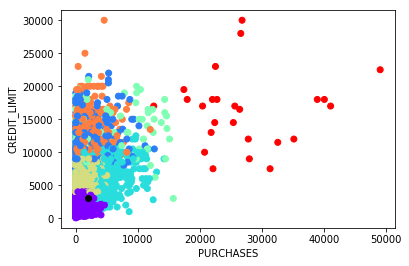

In [40]:
#scatterplot of PURCHASES AND CREDIT_LIMIT with k-means calculated centroids

#clusters of original features based on original category
plt.xlabel('PURCHASES')
plt.ylabel('CREDIT_LIMIT')
plt.scatter(df3['PURCHASES'], df3['CREDIT_LIMIT'], c=df3['CLUSTER'], cmap='rainbow')

#plot x, y axis coordinates for centroids
#new data point is the black dot
plt.scatter(kpred[0],kpred[1],c='black')

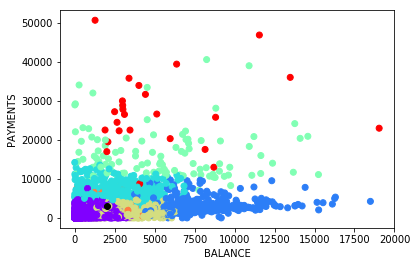

In [41]:
#scatterplot of PURCHASES AND CREDIT_LIMIT with k-means calculated centroids

#clusters of original features based on original category
plt.xlabel('BALANCE')
plt.ylabel('PAYMENTS')
plt.scatter(df3['BALANCE'], df3['PAYMENTS'], c=df3['CLUSTER'], cmap='rainbow')

#new data point is the black dot
plt.scatter(kpred[0],kpred[1],c='black')